# **Problem Statement:**
Using the Australian metrological data, can you predict whether tomorrow it will rain or not at a given location
* Downloading a dataset from Kaggle
* Exploratory data analysis 
* Splitting the data into training, validation & test sets
* Imputing and Scaling numeric features
* Using One-Hot encoding technique to convert categorical columns as one-hot vectors
* Training a Logistic Regression model
* Evaluating the model using a validation set and test set
* Saving the model

# **Logistic Regression**
* we take weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a number between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* The cross entropy loss function is used to evaluate the results
* Image source - [link text](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)
* [Theory for Logistic Regression](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)
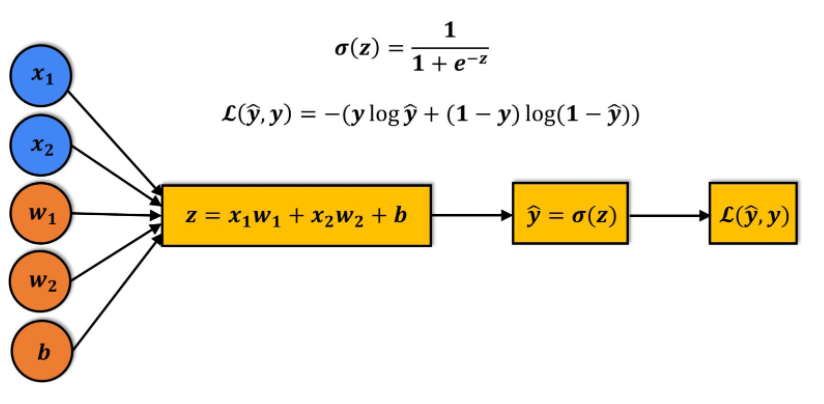

# **Machine Learning Workflow**

The workflow for training a model:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs to the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vamsibatchu05
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 146MB/s]

In [7]:
import os
data_dir = './weather-dataset-rattle-package'
print(os.listdir(data_dir))
train_csv = data_dir + '/weatherAUS.csv'

['weatherAUS.csv']


In [10]:
import pandas as pd
raw_df = pd.read_csv(train_csv)
print((raw_df.shape))
raw_df.head(2)

(145460, 23)


Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No

[2 rows x 23 columns]

objective is to create a model to predict if it will **RainTomorrow**, a classification problem

In [11]:
raw_df['RainTomorrow'].value_counts(dropna = False)

No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

We can drop NaN values from RainTomorrow column as it is a target variable

In [12]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [15]:
raw_df.dropna(subset=['RainToday'], inplace=True)

# **Exploratory Data Analysis**
Relationship between independent features vs Dependent feature (RainTomorrow)

In [17]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [18]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [21]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [27]:
px.scatter(raw_df.sample(10000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainTomorrow')

In [28]:
px.scatter(raw_df.sample(10000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [29]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

## Training, Validation and Test Sets

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 

2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model.

3. **Test set** - used to compare different models or approaches and report the model's final accuracy. 

<img src="https://i.imgur.com/j8eITrK.png" width="480">

As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. 

In [30]:
from sklearn.model_selection import train_test_split

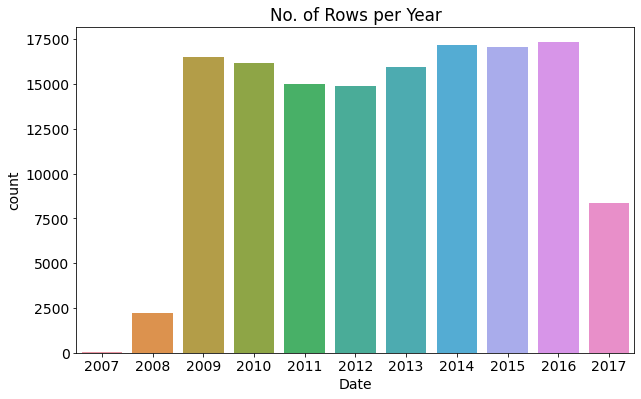

In [31]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [39]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [40]:
print('Training data shape :', train_df.shape)
print('Validation data shape :', val_df.shape)
print('Test data shape :', test_df.shape)

Training data shape : (97988, 23)
Validation data shape : (17089, 23)
Test data shape : (25710, 23)


## Identifying Input and Target Columns

* We can ignore the `Date` column
* Target column - RainTomorrow

In [43]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [44]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [45]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

identifying which of the columns are numerical and which ones are categorical.

In [47]:
import numpy as np
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Executing below command we can get the descriptive stats of all numeric columns. As observed there are columns with NaNs, we have to impute them with mean\median imputation techniques

In [48]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97674.000000  97801.000000  ...  61966.000000  97414.000000
mean      12.007831     23.022202  ...      4.410677     16.835126
std        6.347175      6.984397  ...      2.693370      6.404586
min       -8.500000     -4.100000  ...      0.000000     -5.900000
25%        7.500000     17.900000  ...      2.000000     12.200000
50%       11.800000     22.400000  ...      5.000000     16.600000
75%       16.600000     27.900000  ...      7.000000     21.400000
max       33.900000     48.100000  ...      9.000000     40.200000

[8 rows x 15 columns]

In [49]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [52]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
dtype: int64

The first step in imputation is to fit the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset.

In [54]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

After calling fit, the computed statistic for each column is stored in the statistics_ property of imputer.

In [55]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

The missing values in the training, test and validation sets can now be filled in using the transform method of imputer



In [56]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [57]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

## Scaling Numeric Features

In [58]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm        Temp9am
count  140319.000000  140480.00000  ...  84693.000000  140131.000000
mean       12.184824      23.23512  ...      4.499250      16.987066
std         6.403879       7.11450  ...      2.719752       6.496012
min        -8.500000      -4.80000  ...      0.000000      -7.200000
25%         7.600000      17.90000  ...      2.000000      12.300000
50%        12.000000      22.60000  ...      5.000000      16.700000
75%        16.800000      28.30000  ...      7.000000      21.600000
max        33.900000      48.10000  ...      9.000000      40.200000

[8 rows x 15 columns]

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [61]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483689      0.525947  ...      0.493693      0.507089
std        0.149458      0.131904  ...      0.238028      0.134722
min        0.000000      0.013233  ...      0.000000      0.027426
25%        0.377358      0.429112  ...      0.333333      0.409283
50%        0.478774      0.514178  ...      0.499917      0.502110
75%        0.591981      0.618147  ...      0.666667      0.601266
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 15 columns]

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [62]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [66]:
raw_df2 = raw_df[categorical_cols].fillna('Unknown')

In [67]:
encoder.fit(raw_df2[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [68]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [69]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

The encoder has created a list of categories for each of the categorical columns in the dataset.

We can generate column names for each individual category using get_feature_names.

In [72]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

To perform the encoding, we use the transform method of encoder.

In [73]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

In [74]:
train_inputs.head(2)

Location   MinTemp   MaxTemp  ...  WindDir3pm_WSW  RainToday_No  RainToday_Yes
0   Albury  0.516509  0.523629  ...             0.0           1.0            0.0
1   Albury  0.375000  0.565217  ...             1.0           1.0            0.0

[2 rows x 123 columns]

In [75]:
!pip install pyarrow --quiet

In [77]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

We can read the data back using `pd.read_parquet`.

In [78]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

In [79]:
train_inputs.head(2)

Location   MinTemp   MaxTemp  ...  WindDir3pm_WSW  RainToday_No  RainToday_Yes
0   Albury  0.516509  0.523629  ...             0.0           1.0            0.0
1   Albury  0.375000  0.565217  ...             1.0           1.0            0.0

[2 rows x 123 columns]

# **Training a Logistic Regression Model**

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [81]:
train_inputs[numeric_cols + encoded_cols]

MinTemp   MaxTemp  ...  RainToday_No  RainToday_Yes
0       0.516509  0.523629  ...           1.0            0.0
1       0.375000  0.565217  ...           1.0            0.0
2       0.504717  0.576560  ...           1.0            0.0
3       0.417453  0.620038  ...           1.0            0.0
4       0.613208  0.701323  ...           1.0            0.0
...          ...       ...  ...           ...            ...
144548  0.599057  0.718336  ...           1.0            0.0
144549  0.556604  0.786389  ...           1.0            0.0
144550  0.608491  0.805293  ...           1.0            0.0
144551  0.674528  0.818526  ...           1.0            0.0
144552  0.731132  0.839319  ...           1.0            0.0

[97988 rows x 117 columns]

In [82]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [84]:
model.fit(X_train, train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# **Evaludating Model Performance on Train, Validation and Test data**

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.8519002326815528

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [88]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(train_targets, train_preds, normalize='true')

In [90]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


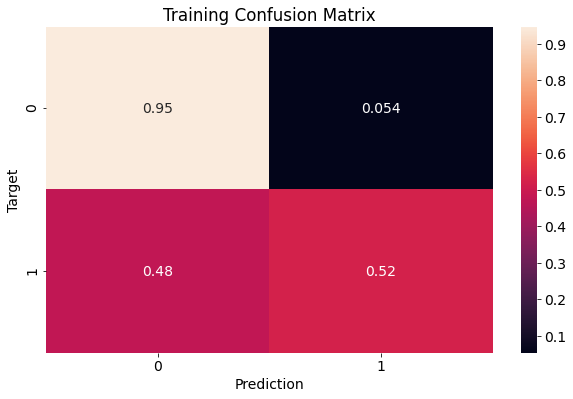

In [91]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

In [92]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 85.41%


Accuracy: 84.25%


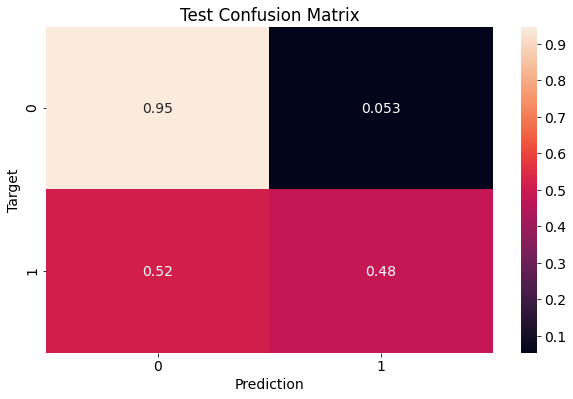

In [93]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')